# 20 Modal identification

In [1]:
import pyFBS

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Data import

Importing of example data: 
 - experimentally obtained FRFs stored in a pickle file

In [2]:
# pyFBS.download_lab_testbench()

In [3]:
exp_file = r"./lab_testbench/Measurements/Y_A.p"

### Experimental data import

In [4]:
freq, Y_AB_exp = np.load(exp_file, allow_pickle = True)
Y_AB_exp = np.transpose(Y_AB_exp, (2, 0, 1))

### Class initalization

In [5]:
_id = pyFBS.modal_id(freq,Y_AB_exp)

### LSCF

In [6]:
_id.pLSCF(max_order=30)

### Stability chart

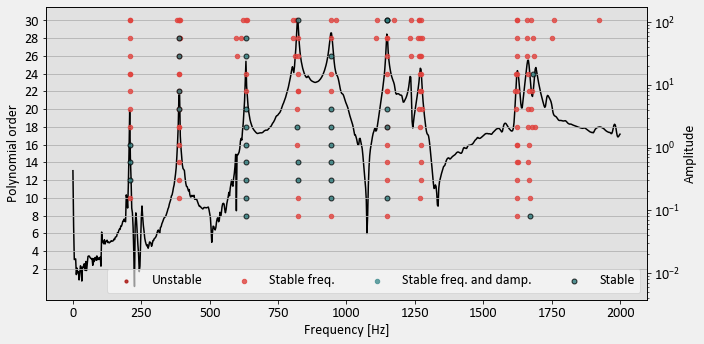

In [7]:
_id.stabilization()

In [12]:
# for automated testing purposes
_id.win.selected_ind = [185, 187]
_id.win.get_modal_data()

### LSFD

In [13]:
_id.pLSFD(lower_residuals=False)

### FRF display

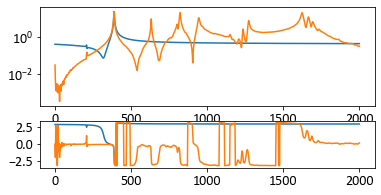

In [14]:
o = 1
i = 1

# %matplotlib inline
plt.subplot(211)
plt.semilogy(freq, np.abs(_id.FRF_rec[:,o,i]))
plt.semilogy(freq, np.abs(Y_AB_exp[:,o,i]));

plt.subplot(413)
plt.plot(freq, np.angle(_id.FRF_rec[:,o,i]))
plt.plot(freq, np.angle(Y_AB_exp[:,o,i]));
plt.show()